In [1]:
from transformers import AutoModelForCausalLM, AutoConfig
import torch
import matplotlib.pyplot as plt

In [2]:
model_name = "gpt2"
gpt2_model = AutoModelForCausalLM.from_pretrained(model_name)
config = AutoConfig.from_pretrained(model_name)

In [43]:
for m in gpt2_model.modules():
    print(m)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)
GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Em

In [14]:
for name, param in gpt2_model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}")
        print(f"Shape: {param.shape}")
        # print(f"Weights (first 5 values of the flattened tensor):\n{param.data.flatten()[:5]}\n")
        print("-" * 30)

Layer: transformer.wte.weight
Shape: torch.Size([50257, 768])
------------------------------
Layer: transformer.wpe.weight
Shape: torch.Size([1024, 768])
------------------------------
Layer: transformer.h.0.ln_1.weight
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_1.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.attn.c_attn.weight
Shape: torch.Size([768, 2304])
------------------------------
Layer: transformer.h.0.attn.c_attn.bias
Shape: torch.Size([2304])
------------------------------
Layer: transformer.h.0.attn.c_proj.weight
Shape: torch.Size([768, 768])
------------------------------
Layer: transformer.h.0.attn.c_proj.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_2.weight
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_2.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.mlp.c_fc.weight
Shape: torch.Siz

In [34]:
gpt2_model_params = torch.cat([p.flatten() for p in gpt2_model.parameters()])

In [ ]:
gpt2_model_params_hist = gpt2_model_params.histogram()

In [39]:
gpt2_model_params_hist

torch.return_types.histogram(
hist=tensor([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        5.0000e+00, 4.0000e+00, 5.0000e+00, 9.0000e+00, 1.1000e+01, 1.8000e+01,
        1.7000e+01, 1.8000e+01, 2.4000e+01, 4.4000e+01, 5.5000e+01, 1.0700e+02,
        1.4000e+02, 2.7200e+02, 4.7000e+02, 9.2600e+02, 2.4030e+03, 1.3320e+04,
        1.2154e+05, 5.0082e+06, 7.8766e+07, 3.9387e+07, 1.0861e+06, 4.0841e+04,
        7.0430e+03, 2.5080e+03, 9.1500e+02, 4.3000e+02, 2.6900e+02, 1.0700e+02,
        6.9000e+01, 6.6000e+01, 3.3000e+01, 2.4000e+01, 2.9000e+01, 1.7000e+01,
        1.1000e+01, 9.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 6.0000e+00, 4.0000e+00, 0.0000e+00, 5.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00,
     

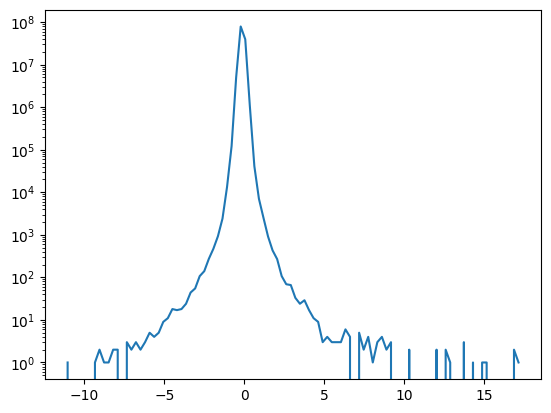

In [41]:
fig, ax = plt.subplots()

ax.plot(gpt2_model_params_hist.bin_edges[:-1].detach().numpy(), gpt2_model_params_hist.hist.detach().numpy())
ax.set_yscale('log')


In [22]:
model_name = "microsoft/bitnet-b1.58-2B-4T"
bitnet_model = AutoModelForCausalLM.from_pretrained(
    model_name
)



You have loaded a BitNet model on CPU and have a CUDA device available, make sure to set your model on a GPU device in order to run your model.


In [4]:
bitnet_model_params = torch.cat([p.flatten() for p in bitnet_model.parameters()])

In [5]:
bitnet_model_hist = bitnet_model_params.histogram()

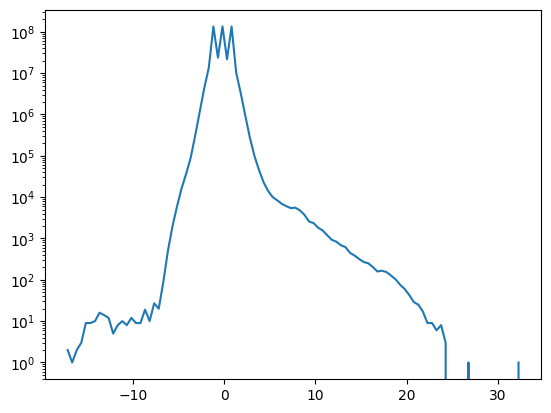

In [7]:
fig, ax = plt.subplots()

ax.plot(bitnet_model_hist.bin_edges[:-1].detach().numpy(), bitnet_model_hist.hist.detach().numpy())
ax.set_yscale('log')


In [ ]:
def get_model_param_hist(model_name):
    model = AutoModelForCausalLM.from_pretrained(model_name)
    model_params = torch.cat([p.flatten() for p in model.parameters()])
    model_hist = model_params.histogram()

    fig, ax = plt.subplots()

    ax.plot(model_hist.bin_edges[:-1].detach().numpy(), model_hist.hist.detach().numpy())
    ax.set_yscale('log')
    fig.show()


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/tmp/ipykernel_32687/891120448.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


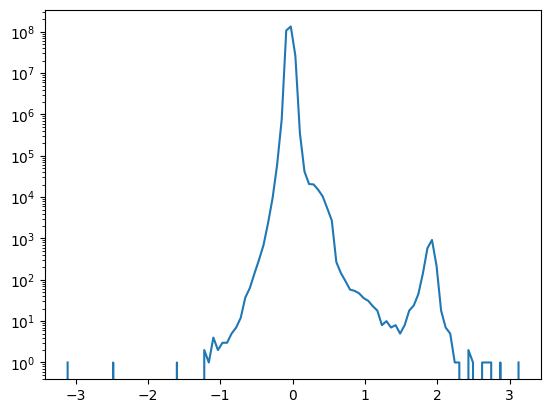

In [5]:
get_model_param_hist("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

In [6]:
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}")
        print(f"Shape: {param.shape}")
        # print(f"Weights (first 5 values of the flattened tensor):\n{param.data.flatten()[:5]}\n")
        print("-" * 30)

Layer: model.embed_tokens.weight
Shape: torch.Size([32000, 2048])
------------------------------
Layer: model.layers.0.self_attn.q_proj.weight
Shape: torch.Size([2048, 2048])
------------------------------
Layer: model.layers.0.self_attn.k_proj.weight
Shape: torch.Size([256, 2048])
------------------------------
Layer: model.layers.0.self_attn.v_proj.weight
Shape: torch.Size([256, 2048])
------------------------------
Layer: model.layers.0.self_attn.o_proj.weight
Shape: torch.Size([2048, 2048])
------------------------------
Layer: model.layers.0.mlp.gate_proj.weight
Shape: torch.Size([5632, 2048])
------------------------------
Layer: model.layers.0.mlp.up_proj.weight
Shape: torch.Size([5632, 2048])
------------------------------
Layer: model.layers.0.mlp.down_proj.weight
Shape: torch.Size([2048, 5632])
------------------------------
Layer: model.layers.0.input_layernorm.weight
Shape: torch.Size([2048])
------------------------------
Layer: model.layers.0.post_attention_layernorm.weig

In [10]:
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-small")

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [26]:
model = AutoModelForCausalLM.from_pretrained("abbas/gpt2-horror-stories")

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

In [18]:
for m in model.modules():
    print(m)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)
GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Em

In [27]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}")
        print(f"Shape: {param.shape}")
        # print(f"Weights (first 5 values of the flattened tensor):\n{param.data.flatten()[:5]}\n")
        print("-" * 30)

Layer: transformer.wte.weight
Shape: torch.Size([50257, 768])
------------------------------
Layer: transformer.wpe.weight
Shape: torch.Size([1024, 768])
------------------------------
Layer: transformer.h.0.ln_1.weight
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_1.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.attn.c_attn.weight
Shape: torch.Size([768, 2304])
------------------------------
Layer: transformer.h.0.attn.c_attn.bias
Shape: torch.Size([2304])
------------------------------
Layer: transformer.h.0.attn.c_proj.weight
Shape: torch.Size([768, 768])
------------------------------
Layer: transformer.h.0.attn.c_proj.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_2.weight
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_2.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.mlp.c_fc.weight
Shape: torch.Siz

In [11]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}")
        print(f"Shape: {param.shape}")
        # print(f"Weights (first 5 values of the flattened tensor):\n{param.data.flatten()[:5]}\n")
        print("-" * 30)

Layer: transformer.wte.weight
Shape: torch.Size([50257, 768])
------------------------------
Layer: transformer.wpe.weight
Shape: torch.Size([1024, 768])
------------------------------
Layer: transformer.h.0.ln_1.weight
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_1.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.attn.c_attn.weight
Shape: torch.Size([768, 2304])
------------------------------
Layer: transformer.h.0.attn.c_attn.bias
Shape: torch.Size([2304])
------------------------------
Layer: transformer.h.0.attn.c_proj.weight
Shape: torch.Size([768, 768])
------------------------------
Layer: transformer.h.0.attn.c_proj.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_2.weight
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.ln_2.bias
Shape: torch.Size([768])
------------------------------
Layer: transformer.h.0.mlp.c_fc.weight
Shape: torch.Siz

In [28]:
config = AutoConfig.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

In [29]:
hidden_size = config.hidden_size
intermediate_size = config.intermediate_size
num_heads = config.num_attention_heads
num_kv_heads = config.num_key_value_heads 

In [8]:
MODEL_TAXONOMY = {
    "attention_query": [],
    "attention_key": [],
    "attention_value": [],
    "attention_output": [],
    "mlp_up": [],
    "mlp_down": [],
    "mlp_gate": [], 
    "pre_attention_norm": [],
    "post_attention_norm": [],
    "token_embeddings": [],
    "position_embeddings": [],
    "final_norm": [],
    "lm_head": []
}